### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

Failing to meet any of these requirements might lead to a request for resubmission if the errors are serious enough.

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [4]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [5]:
NAME1 = ""
NAME2 = ""
GROUP = ""

### Check Python version

In [6]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [7]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [8]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [9]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](https://upload.wikimedia.org/wikipedia/en/4/46/Pokemon_Go.png)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a different and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). To download the dataset you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall).

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's longitude and latitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration

Feel free to temporarily add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The Python docs](https://docs.python.org/3/), [PyTorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

To pass this assignment, your solutions should pass all tests (`assert`-statements). Note that the tests shown to you are not exhaustive, and additional hidden tests exist for some of the tasks. Further, similar to IHA1, this notebook contains some questions where we ask you to reflect upon some results. These questions will not be graded in detail, but we still expect you to answer them.

## 0. Imports

Import any necessary modules here.

In [10]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three Pokémon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, either use [this link](https://www.kaggle.com/semioniy/predictemall) to do so (and place the file in the same folder as this notebook), or simply run the cell below. You might have to [create a new API token](https://www.kaggle.com/settings/account) before the commands work.

In [11]:
!kaggle datasets download -d semioniy/predictemall
!unzip -u predictemall.zip
!rm -rf predictemall.zip 300k_arff 300k.arff 300k_csv

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
# TODO: load the dataset using pandas to a dataframe called df
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("300k.csv")

C:\Users\majed\AppData\Local\Temp\ipykernel_20396\2336927798.py:5: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("300k.csv")


In [13]:
assert df.shape == (
    296021,
    208,
), f"Dataframe has not the right shape. {df.shape} != (296021, 208)"
assert isinstance(df, pd.DataFrame), f"df is not a dataframe. Was {type(df)}"

Modify `df` to only have the columns `latitude`, `longitude`, and `class`.

In [14]:
df = df[['latitude', 'longitude', 'class']]

In [15]:
assert len(df.columns) == 3, "There should be 3 columns"
assert len(df.shape) == 2, "The dataframe should be 2 dimensional"
assert df.shape == (296021, 3), "Wrong shape of the dataframe"
assert "latitude" in df.columns, "latitude column is missing"
assert "longitude" in df.columns, "longitude column is missing"
assert "class" in df.columns, "class column is missing"

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For your convenience, we provide the dictionary `name_dict` to convert between ids and names (we'll do this soon).

In [16]:
from utils import name_dict

In [17]:
# example usage (you can index either by name or id)
print(name_dict["Gengar"])
print(name_dict[94])

94
Gengar


In [18]:
# for convenience, let's add a new column to the dataframe with the name of the pokemon
df["name"] = df["class"].apply(lambda x: name_dict[x])
print(df.head())

    latitude   longitude  class    name
0  20.525745  -97.460829     16  Pidgey
1  20.523695  -97.461167    133   Eevee
2  38.903590  -77.199780     16  Pidgey
3  47.665903 -122.312561     13  Weedle
4  47.666454 -122.311628    133   Eevee


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://www.pokemon.com/static-assets/content-assets/cms2/img/pokedex/full/128.png></td>
  </tr>
</table>



Filter the dataset to contain only these three types of pokemon and save it in the DataFrame `filtered_df`.

In [19]:
# YOUR CODE HERE
# filter the dataframe to only include Diglett, Seel, and Tauros
filtered_df = df[df["name"].isin(["Diglett", "Seel", "Tauros"])] #Keep rows where the 'name' column is either 'Diglett', 'Seel', or 'Tauros'

print(
    f"We have {len(filtered_df)} instances of Diglett, Seel, and Tauros in the dataset."
)

We have 2083 instances of Diglett, Seel, and Tauros in the dataset.


In [20]:
assert len(np.unique(filtered_df["class"])) == 3, "There should be 3 unique classes."
assert filtered_df.shape == (
    2083,
    4,
), "The shape of the filtered dataframe is incorrect."

In an earlier cell, you could see that the dataset has 208 features per pokemon sighting (`df.shape == (296021, 208)`). Why do we only use the `longitude` and `latitude` features and not all the features? 

**Your answer:** Becuase we are interested in finding the pokemon's geographical location which we obtain by combining the latitude and longitude.

## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

<Axes: title={'center': 'Number of Occurrences of Each Pokemon'}, xlabel='name'>

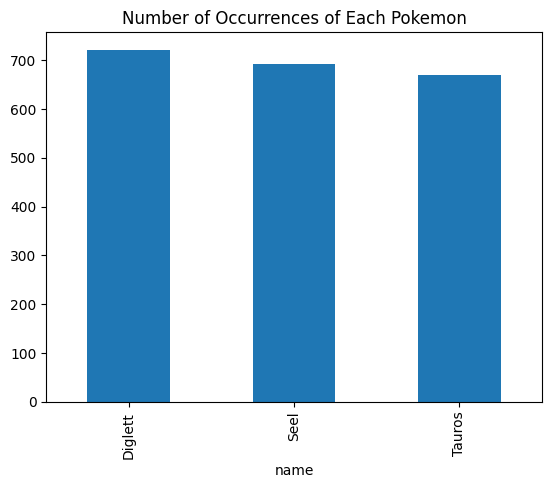

In [21]:
# YOUR CODE HERE
filtered_df['name'].value_counts().plot.bar(title='Number of Occurrences of Each Pokemon')


Is the dataset balanced? Why/why not? Why is this important?

**Your answer:** It seems to be balanced which is a good thing because that helps the model learn all classes equally and not be biased toward any single class.

Plot a scatter plot where the first dimension is longitude, the second is latitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

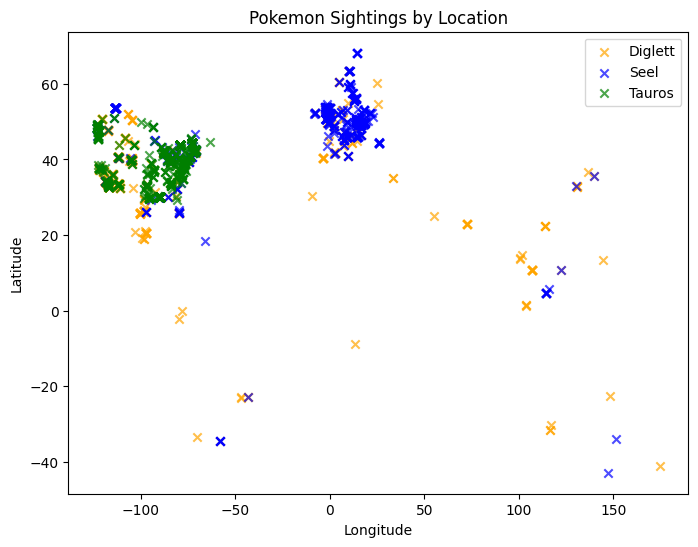

In [22]:
# Scatter plot: longitude vs latitude, colored by Pokemon name
colors = {'Diglett': 'orange', 'Seel': 'blue', 'Tauros': 'green'}
plt.figure(figsize=(8,6))
for name, group in filtered_df.groupby('name'):
    plt.scatter(group['longitude'], group['latitude'], c=colors[name], label=name, marker='x', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pokemon Sightings by Location')
plt.legend()
plt.show()

Is there any other visualization you think would be useful? If so, insert them here.

In [23]:
# YOUR CODE HERE

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** I think it is difficult since the diglett and seel are quite separated and therefore difficult to classify their probable position. A part of seel and the entire taurus are however easier to classify since they are very close to each other. Making it easier for the classifier to guess correctly when looking at those geographical locations. 

Which accuracy do you expect to achieve?

**Your answer:** 60%

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. We will use some PyTorch utilities to help us with this task.

Start by creating the input and output vectors, `x` and `y`. The input should be latitude and longitude, and the output should be the class of the pokemon. Note that you cannot use the class names directly, as they are strings. You need to introduce some mapping to convert them to integers (0, 1, and 2) or one-hot vectors.

In [24]:
# YOUR CODE HERE
x = filtered_df[['latitude', 'longitude']].to_numpy(dtype=np.float32)
name_to_label = {'Diglett': 0, 'Seel': 1, 'Tauros': 2}
y = filtered_df['name'].map(name_to_label).to_numpy(dtype=np.int64)
print(f"Shape of input data: {x.shape}")
print(f"Shape of labels: {y.shape}")

Shape of input data: (2083, 2)
Shape of labels: (2083,)


In [25]:
assert isinstance(x, np.ndarray), "x should be a numpy array"
assert isinstance(y, np.ndarray), "y should be a numpy array"

assert x.shape[0] == y.shape[0], "x and y should have the same number of samples"
assert x.shape[-1] == 2, "x should have 2 features"
assert x.dtype == np.float32, "x should be of type float32"
if y.shape[-1] == 3:  # one-hot encoded
    assert y.max() == 1, "one-hot encoded y, at least one entry should be 1"
    assert y.min() == 0, "one-hot encoded y, at least one entry should be 0"
    assert y.sum(axis=1).all() == 1
else:  # label encoded
    assert y.max() == 2, "label encoded y, should have a max value of 2"
    assert y.min() == 0, "label encoded y, should have a min value of 0"

Separate your data into training (55%), validation (25%) and test sets (20%) and save them as `dataset_train`, `dataset_val`, `dataset_test`. If you wish to apply any transformation to the dataset, do it here as well. 

Further, create a class, PokemonDataset, inheriting from PyTorch [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and use this for storing the data. In other words, `dataset_train`, `dataset_val`, `dataset_test` should have type PokemonDataset. You will need to implement a `__getitem__`, `__len__` and `__init__` method. Although perhaps a bit overkill for this assignment, it is a good practice for handling datasets in PyTorch.

Last, instantiate a [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for each dataset, i.e., `loader_train`, `loader_val`, `loader_test`. This will fetch samples from the datasets and combine them into batches. Remember to select a suitable batch size.

In [26]:
from torch.utils.data import Dataset, DataLoader
import torch
num_samples = filtered_df.shape[0]
random = np.random.permutation(num_samples)
train_end = int(0.55 * num_samples)
val_end = train_end + int(0.25 * num_samples)
train_indices = random[:train_end]
val_indices = random[train_end:val_end]
test_indices = random[val_end:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

class PokemonDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

dataset_train = PokemonDataset(x_train, y_train)
dataset_val = PokemonDataset(x_val, y_val)
dataset_test = PokemonDataset(x_test, y_test)

loader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_val = DataLoader(dataset_val, batch_size=32, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)

In [27]:
assert isinstance(
    dataset_train, PokemonDataset
), "dataset_train should be an instance of PokemonDataset"
assert isinstance(
    dataset_val, PokemonDataset
), "dataset_val should be an instance of PokemonDataset"
assert isinstance(
    dataset_test, PokemonDataset
), "dataset_test should be an instance of PokemonDataset"

assert (
    abs(len(dataset_train) / len(x) - 0.55) < 0.01
), "dataset_train has the wrong length, should be 55% of the data"
assert (
    abs(len(dataset_val) / len(x) - 0.25) < 0.01
), "dataset_val has the wrong length, should be 25% of the data"
assert (
    abs(len(dataset_test) / len(x) - 0.20) < 0.01
), "dataset_test has the wrong length, should be 20% of the data"

assert isinstance(
    loader_train, DataLoader
), "loader_train should be an instance of DataLoader"
assert isinstance(
    loader_val, DataLoader
), "loader_val should be an instance of DataLoader"
assert isinstance(
    loader_test, DataLoader
), "loader_test should be an instance of DataLoader"

assert len(loader_train), "loader_train should have a length"
assert len(loader_val), "loader_val should have a length"
assert len(loader_test), "loader_test should have a length"

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), optimizer, loss function and then train the network. 

Start by implementing a training loop, and a helper function to calculate the accuracy. The training loop should calculate the loss and accuracy for both the training and validation set and print it with some regular interval (each epoch, or every few epochs, for instance). It can also be helpful to plot the loss and accuracy for both the training and validation set, either in the training loop, or after it has finished (i.e., you have to store the values during training and return them).

We have prepared the `train_model` function with the arguments you need, but you have access to *args and **kwargs if you want to pass additional arguments to the function.

In [28]:
from typing import Callable, Union

import torch
import torch.nn as nn
import torch.utils

def accuracy(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    Compute the accuracy of the model.

    Args:
    y_hat: torch.Tensor: The model predictions (probability per class), shape: [batch_size, num_classes]
    y: torch.Tensor: The true labels, shape: [batch_size]

    Returns:
    torch.Tensor: The accuracy of the model
    """
    #YOUR CODE HERE
    if y.dim() == 2 and y.shape == y_hat.shape:
        y_true = y.argmax(dim=1)
    else:
        y_true = y.squeeze().long()

    # multiclass vs binary/logit
    if y_hat.dim() > 1 and y_hat.size(1) > 1:
        preds = y_hat.argmax(dim=1)
    else:
        preds = (torch.sigmoid(y_hat.squeeze()) > 0.5).long()

    return (preds == y_true).float().mean()

def train_model(
    model: nn.Module,
    optimizer: torch.optim,
    loss_fn: Union[Callable, nn.Module],
    num_epochs: int,
    train_dataloader: torch.utils.data.DataLoader,
    val_dataloader: torch.utils.data.DataLoader,
    device: Union[str, torch.device],
    *args,
    **kwargs,
):
    """
    Train the model.

    Args:
    model: nn.Module: The neural network model
    optimizer: torch.optim: The optimizer used to update the model parameters
    loss_fn: Union[Callable, nn.Module]: The loss function used to compute the loss
    num_epochs: int: The number of epochs to train the model
    train_dataloader: torch.utils.data.DataLoader: The training dataloader
    val_dataloader: torch.utils.data.DataLoader: The validation dataloader
    device: Union[str, torch.device]: The device to run the training on
    *args: Additional arguments to pass to the train function
    **kwargs: Additional keyword arguments to pass to the train function
    """
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        for xb, yb in train_dataloader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            y_hat = model(xb)
            loss = loss_fn(y_hat, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
            train_acc += (y_hat.argmax(dim=1) == yb).float().sum().item()
        train_loss /= len(train_dataloader.dataset)
        train_acc /= len(train_dataloader.dataset)

        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with torch.no_grad():
            for xb, yb in val_dataloader:
                xb, yb = xb.to(device), yb.to(device)
                y_hat = model(xb)
                loss = loss_fn(y_hat, yb)
                val_loss += loss.item() * xb.size(0)
                val_acc += (y_hat.argmax(dim=1) == yb).float().sum().item()
        val_loss /= len(val_dataloader.dataset)
        val_acc /= len(val_dataloader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Next, we'll test that your training loop is correct. A [common sanity check in deep learning](https://karpathy.github.io/2019/04/25/recipe/) is to overfit to a small dataset, like a single batch of data. This ensures that shapes and devices are correctly set, and the network can learn/memorize the training data, which is a good starting point before training on the full dataset.

In [29]:
def test_train_loop():
    import torch.nn as nn
    import torch.optim as optim
    import torch.utils.data as data

    # init simple model, optimizer, loss_fn, dataloaders
    linear_model = nn.Linear(2, 3)
    optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    testing_loader_train = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )
    testing_loader_val = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )

    # copy parameters to check for changes
    params_before_training = list(linear_model.parameters())
    params_before_training = [p.clone().to("cpu") for p in params_before_training]

    print("Testing training loop, CPU")
    train_model(
        model=linear_model,
        optimizer=optimizer,
        loss_fn=loss_fn,
        num_epochs=100,
        train_dataloader=testing_loader_train,
        val_dataloader=testing_loader_val,
        device="cpu",
    )
    if torch.cuda.is_available():
        print("Testing training loop, CUDA")
        train_model(
            model=linear_model,
            optimizer=optimizer,
            loss_fn=loss_fn,
            num_epochs=100,
            train_dataloader=testing_loader_train,
            val_dataloader=testing_loader_val,
            device="cuda" if torch.cuda.is_available() else "cpu",
        )

    params_after_training = list(linear_model.parameters())
    params_after_training = [p.clone().to("cpu") for p in params_after_training]
    for p_before, p_after in zip(params_before_training, params_after_training):
        assert torch.any(
            p_before != p_after
        ), "Model parameters did not change during training"

    # check that we could overfit a single example
    (x, y) = next(iter(testing_loader_train))
    x.to("cpu")
    y.to("cpu")
    linear_model.to("cpu")
    assert (
        linear_model(x).argmax().item() == y.item()
    ), "Model could not overfit a single example"


def test_accuracy():
    y_pred = torch.tensor([[0.1, 0.8, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])
    y_true = torch.tensor([1, 0, 2])
    acc = accuracy(y_pred, y_true)
    assert isinstance(acc, torch.Tensor), "Accuracy should be a torch.Tensor"
    assert torch.isclose(acc, torch.tensor(2 / 3)), f"Accuracy is {acc}, expected 2/3"


try:
    test_train_loop()
except Exception as e:
    print(e)
    assert False, "Training test failed, see error above"

test_accuracy()

Testing training loop, CPU
Epoch 1/100 | Train Loss: 1.6535 | Train Acc: 0.0000 | Val Loss: 1.1759 | Val Acc: 0.0000
Epoch 2/100 | Train Loss: 1.5339 | Train Acc: 0.0000 | Val Loss: 1.1580 | Val Acc: 0.0000
Epoch 3/100 | Train Loss: 1.4228 | Train Acc: 0.0000 | Val Loss: 1.1417 | Val Acc: 0.0000
Epoch 4/100 | Train Loss: 1.3200 | Train Acc: 0.0000 | Val Loss: 1.1268 | Val Acc: 0.0000
Epoch 5/100 | Train Loss: 1.2252 | Train Acc: 0.0000 | Val Loss: 1.1134 | Val Acc: 0.5000
Epoch 6/100 | Train Loss: 1.1380 | Train Acc: 0.0000 | Val Loss: 1.1012 | Val Acc: 0.5000
Epoch 7/100 | Train Loss: 1.0581 | Train Acc: 0.5000 | Val Loss: 1.0903 | Val Acc: 0.5000
Epoch 8/100 | Train Loss: 0.9850 | Train Acc: 0.5000 | Val Loss: 1.0806 | Val Acc: 0.5000
Epoch 9/100 | Train Loss: 0.9182 | Train Acc: 0.5000 | Val Loss: 1.0718 | Val Acc: 0.5000
Epoch 10/100 | Train Loss: 0.8572 | Train Acc: 0.5000 | Val Loss: 1.0640 | Val Acc: 0.5000
Epoch 11/100 | Train Loss: 0.8014 | Train Acc: 0.5000 | Val Loss: 1.0571

Now, create a neural network using PyTorch. You can use any architecture you want. Save the model in the variable `model`.

In [30]:
# Simple MLP for 2D input, 3-class output
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32, output_dim=3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleMLP()

In [31]:
assert isinstance(model, nn.Module)


# check that we can run input of shape (batch_size, 2) through the model, with batch_size=16
def test_model_output_shape(model):
    is_model_on_cuda = next(model.parameters()).is_cuda
    device = torch.device("cuda" if is_model_on_cuda else "cpu")
    assert (
        len(model(torch.randn(16, 2, device=device))) == 16
    ), "The model should not change the batch size"


test_model_output_shape(model)

Train the network. 

For you to pass this assignment, you must obtain an accuracy on the test set greater than 60%. You can use the validation set as a proxy during development, but remember that they can differ slightly. We use the test set, as this better represents the performance of the model on new, unseen data (which is the ultimate goal).

To reach the level of performance, it may be necessary to search for a good architecture by trying several different ones. Last, if you want a challenge, try getting an accuracy greater than 75% (our reference solution achieves ~78%).

Again, it might be useful to plot the loss and accuracy (for training and validation) during training.

Epoch 1/200 - Train Loss: 10.4916 - Val Loss: 2.9146 - Val Acc: 0.519 - LR: 0.007000
Epoch 10/200 - Train Loss: 0.7824 - Val Loss: 0.8367 - Val Acc: 0.619 - LR: 0.007000
Epoch 10/200 - Train Loss: 0.7824 - Val Loss: 0.8367 - Val Acc: 0.619 - LR: 0.007000
Epoch 20/200 - Train Loss: 0.7783 - Val Loss: 0.8123 - Val Acc: 0.625 - LR: 0.007000
Epoch 20/200 - Train Loss: 0.7783 - Val Loss: 0.8123 - Val Acc: 0.625 - LR: 0.007000
Epoch 30/200 - Train Loss: 0.7510 - Val Loss: 0.8040 - Val Acc: 0.640 - LR: 0.007000
Epoch 30/200 - Train Loss: 0.7510 - Val Loss: 0.8040 - Val Acc: 0.640 - LR: 0.007000
Epoch 40/200 - Train Loss: 0.7529 - Val Loss: 0.7945 - Val Acc: 0.635 - LR: 0.007000
Epoch 40/200 - Train Loss: 0.7529 - Val Loss: 0.7945 - Val Acc: 0.635 - LR: 0.007000
Epoch 50/200 - Train Loss: 0.7495 - Val Loss: 0.8118 - Val Acc: 0.663 - LR: 0.003500
Epoch 50/200 - Train Loss: 0.7495 - Val Loss: 0.8118 - Val Acc: 0.663 - LR: 0.003500
Epoch 60/200 - Train Loss: 0.7386 - Val Loss: 0.8304 - Val Acc: 0

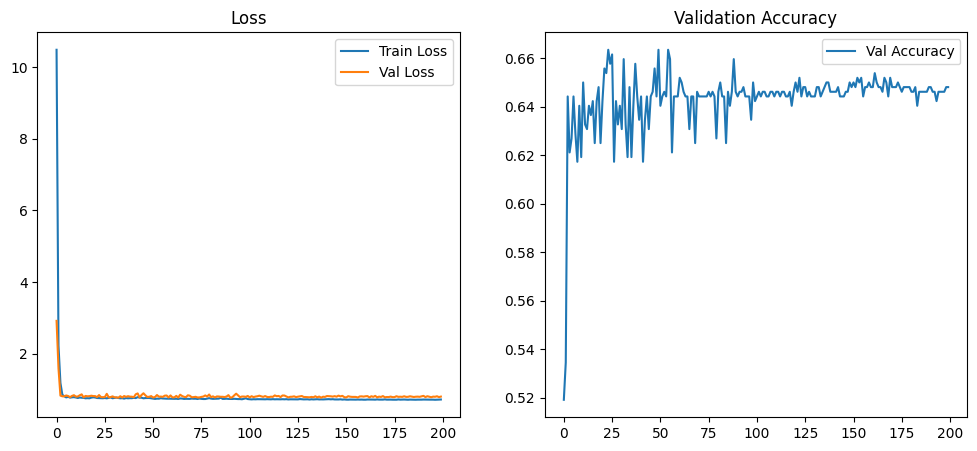

Average validation accuracy (last 10 epochs): 0.646


In [48]:
# Improved training loop and model for higher accuracy
import torch.optim as optim
import matplotlib.pyplot as plt

# Try a deeper/wider model for better accuracy
class ImprovedMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=256, output_dim=3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ImprovedMLP()

# Hyperparameters
epochs = 200
learning_rate = 0.007
batch_size = 64

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Add learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in loader_train:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    train_loss = running_loss / len(loader_train.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in loader_val:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item() * xb.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    val_loss = val_loss / len(loader_val.dataset)
    val_losses.append(val_loss)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step()  # Step the scheduler at the end of each epoch
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.3f} - LR: {scheduler.get_last_lr()[0]:.6f}")

# Plot loss and accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

# Calculate average validation accuracy
def moving_average(data, window_size=10):
    if len(data) < window_size:
        return sum(data) / len(data)
    return sum(data[-window_size:]) / window_size

avg_val_acc = moving_average(val_accuracies, window_size=10)
print(f"Average validation accuracy (last 10 epochs): {avg_val_acc:.3f}")

Let's have a look at what we have learned! Create a function that visualizes the decision regions of the network. Overlap it with the points corresponding to the training data and validations data, such as in Section 2, by using the scatter plot function. The training and validation points should have different markers and/or colors. Last, call the function to visualize the decision regions of your network.

Hint: A simple way to show the decision region is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

In [50]:
def plot_decision_region(model: nn.Module, x_train, y_train, x_val, y_val):
    """
    Plot the decision region of the model.
    
    Args:
        model: nn.Module: The trained model
        x_train: Training features (numpy array or torch.Tensor)
        y_train: Training labels (numpy array or torch.Tensor)
        x_val: Validation features (numpy array or torch.Tensor)
        y_val: Validation labels (numpy array or torch.Tensor)
    """
    # Convert to numpy if needed
    if torch.is_tensor(x_train): x_train = x_train.cpu().numpy()
    if torch.is_tensor(y_train): y_train = y_train.cpu().numpy()
    if torch.is_tensor(x_val): x_val = x_val.cpu().numpy()
    if torch.is_tensor(y_val): y_val = y_val.cpu().numpy()

    # Define grid
    x_min, x_max = min(x_train[:,0].min(), x_val[:,0].min()) - 0.5, max(x_train[:,0].max(), x_val[:,0].max()) + 0.5
    y_min, y_max = min(x_train[:,1].min(), x_val[:,1].min()) - 0.5, max(x_train[:,1].max(), x_val[:,1].max()) + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on grid
    model.eval()
    with torch.no_grad():
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        logits = model(grid_tensor)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    zz = preds.reshape(xx.shape)

    # Plot decision region
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.coolwarm)
    # Plot training points
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', cmap=plt.cm.coolwarm, edgecolor='k', label='Train')
    # Plot validation points
    plt.scatter(x_val[:,0], x_val[:,1], c=y_val, marker='^', cmap=plt.cm.coolwarm, edgecolor='k', label='Val')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Decision Regions')
    plt.show()

# Example usage (replace with your actual data variables):
# plot_decision_region(model, x_train, y_train, x_val, y_val)

Do the learned decision regions look like you would expect? Can they be improved? In what sense, and how would that change your model? Please comment on your results. 

**Your answer:** (fill in here)

### 4.1. Model capacity and generalization

Now we have all the neccessary tools to do a small experiment on model capacity and implications on generalization.

Begin by defining a neural network `tiny_model` with a single linear layer and appropriate activation function. Then, train the network until convergence (should be fast).

In [34]:
# YOUR CODE HERE

In [35]:
assert isinstance(tiny_model, nn.Module), "tiny_model should be a torch.nn.Module"
test_model_output_shape(tiny_model)

NameError: name 'tiny_model' is not defined

Now, draw the decision regions of the network as you did in the previous section. Before running the code, think about what you expect to see. What will the regions look like? How will they differ from the previous ones?

In [ ]:
# YOUR CODE HERE

Are the decision regions any different? Why/why not? What does this tell you about the model capacity and generalization?

**Your answer:** (fill in here)

Next, create a neural network `large_model` with many layers and/or hidden units. Try to maximize the training accuracy (0.7-0.8). Getting these models to converge might be a bit tricky, so you might have to adjust the learning rate, the optimizer, etc. Also, might be easier to have a wide model (large number of hidden units, say 1024 per layer) than a deep model (more than 4 layers).

Feel free to experiment, but if you get stuck, our model is a MLP with an input layer, 4 hidden layers with 1024 units each, and an output layer. We used the ReLU activation function between each layer and a softmax for the output layer. We used the Adam optimizer with a learning rate of 0.003 and a batch size of 512. We trained for at least a few hundred epochs. Also, normalizing the input can be helpful (zero mean and unit variance).

In [49]:
# Large model with more hidden layers and units
import torch.nn as nn
import torch.nn.functional as F

class LargeMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=1024, output_dim=3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

large_model = LargeMLP()

In [ ]:
assert isinstance(large_model, nn.Module), "large_model should be a torch.nn.Module"
test_model_output_shape(large_model)

Again, draw the decision regions of the network. What do you expect to see now? How will the regions differ from the previous ones?

In [ ]:
# YOUR CODE HERE

How do the decision regions differ between the tiny, large and the network you trained? Can you explain why this happens? Relate your answer to the concepts you learned in the first lectures.

**Your answer:** (fill in here)

## 5. Evaluation

Back to your original model. Once you achieved at least 60% accuracy in the validation set with your main model, we are done with its training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [ ]:
main_model_test_accuracy = 0
# YOUR CODE HERE
print(f"Test accuracy: {main_model_test_accuracy:.3f}.")

In [ ]:
assert main_model_test_accuracy > 0.6

Most likely, you'll get a different (slightly worse) accuracy than the one you got on the validation set. Why is this? Also, why do we need both a test and validation set?

**Your answer:** (fill in here)

Next, compute the confusion matrix of your predictions on the test set and save it as `conf_mat`.

In [ ]:
# YOUR CODE HERE
print(conf_mat)

In [ ]:
assert isinstance(conf_mat, np.ndarray) or isinstance(
    conf_mat, torch.Tensor
), "conf_mat should be a numpy array or torch.Tensor"
assert conf_mat.shape == (3, 3), "conf_mat should have shape (3, 3), i.e. 3 classes"
assert np.sum(conf_mat) == len(
    dataset_test
), "conf_mat should sum up to the number of test samples"

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [ ]:
# YOUR CODE HERE

What does/do this/these histogram(s) show you? Could it be beneficial to add this/these new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not expect very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE